### Monthly provisional counts of deaths by age group and HHS region for select causes of death

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

In [2]:
file= pd.read_csv("death_by_disease.csv")

In [3]:
death_cause= pd.DataFrame(file)
death_cause

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Getting rid of unneeded columns

death_updated=death_cause.drop(columns=['flag_allcause','flag_natcause','flag_sept','flag_neopl',
                                        'flag_diab','flag_alz','flag_inflpn','flag_clrd','flag_otherresp',
                                        'flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod',
                                        'flag_cov19ucod'])
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [5]:
death_updated[death_updated["Note"].str.contains("Data are provisional, and values in the most recent months are incomplete.")==False]
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [6]:
death_updated["Note"].nunique()

1

In [7]:
# Deleted note column

del death_updated['Note']
death_updated.fillna(0, inplace =True)
death_updated.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [8]:
# Cleaned up column names

dict = {'Septicemia (A40-A41)': 'Septicemia',
        'Malignant neoplasms (C00-C97)': 'Malignant_neoplasms',
        'Diabetes mellitus (E10-E14)': 'Diabetes_mellitus',
        'Alzheimer disease (G30)': 'Alzheimer_disease',
        'Influenza and pneumonia (J09-J18)': 'Influenza_pneumonia',
        'Chronic lower respiratory diseases (J40-J47)': 'Chronic_lower_respiratory_diseases',
        'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)': 'Other_diseases_of_respiratory_system',
        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Nephritis',
        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Diseases_of_heart',
        'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_diseases',
        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple_Cause_of_Death',
        'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying_Cause_of_Death',
        'AnalysisDate':'AnalysisDate'
       }

death_updated.rename(columns=dict,
          inplace=True)

death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [9]:
# Review current columns

death_updated.count()

Date Of Death Year                                                               2970
Date Of Death Month                                                              2970
HHSRegion                                                                        2970
AgeGroup                                                                         2970
AllCause                                                                         2970
NaturalCause                                                                     2970
Septicemia                                                                       2970
Malignant_neoplasms                                                              2970
Diabetes_mellitus                                                                2970
Alzheimer_disease                                                                2970
Influenza_pneumonia                                                              2970
Chronic_lower_respiratory_diseases                    

In [10]:
# Create a cleaner DF with only the key Covid-related columns

covid_death = death_updated.drop(columns=['Septicemia', 'Malignant_neoplasms', 'Diabetes_mellitus',
                                          'Alzheimer_disease','Influenza_pneumonia', 
                                          'Chronic_lower_respiratory_diseases', 
                                          'Other_diseases_of_respiratory_system',
                                          'Nephritis',
                                          'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
                                          'Diseases_of_heart', 'Cerebrovascular_diseases'])
                                
covid_death

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,101.0,83.0,4/23/2021


In [74]:
# Create DF with only certain selects - need to sort by age correctly 

# Capture for all US only
covid_death_us =covid_death[covid_death["HHSRegion"].str.contains("United States")==True]


#age_death = covid_death_us.groupby("AgeGroup").agg(["sum"])
#age_death = covid_death_us.groupby("AgeGroup").sum()

age_death = covid_death_us.groupby("AgeGroup").count()
age_death = age_death.sum() 
age_death_reset = age_death.reset_index(0,5,1,2,3,4,6,7,8,9)

    
# age_death.reindex(0,5,1,2,3,4,5,6,7,8,9)
# #new_index = (['0-4 years','5-14 years','15-24 years',
#                   '25-34 years','35-44 years','45-54 years','55-64 years',
#                '65-74 years','75-84 years','85 years and over'])




#age_death.sort_values(by=new_index)
# age_death.sort_index(new_index)
#age_death.reindex(new_index)

#age_death.reindex(['AgeGroup'](['0-4 years','5-14 years','15-24 years','25-34 years','35-44 years','45-54 years','55-64 years','65-74 years','75-84 years','85 years and over'])


    
age_death_reset
    
# # Now capture for months starting March 2020 only 
# age_death = age_death.loc[covid_death_us['Date Of Death Year'] != 2019]    
# age_death = age_death.loc[(covid_death_us['Date Of Death Year'] == 2021) | (covid_death_us['Date Of Death Month'] > 2)]

# # Data is now only key columns, all US, months since March 2020

# age_death.head(10)

TypeError: reset_index() takes from 1 to 5 positional arguments but 11 were given

In [84]:
age_death.index

Index(['0-4 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years',
       '5-14 years', '55-64 years', '65-74 years', '75-84 years',
       '85 years and over'],
      dtype='object', name='AgeGroup')

In [86]:
# Create a groupby on age displaying sum and mean aggregated - including natural all and natural causes - need to sort by age correctly 

# WORKS FOR ORGANIZING 

age_death = covid_death_us.groupby("AgeGroup").agg(["sum", "count"])
age_death = age_death.reindex(['0-4 years', '5-14 years','15-24 years', '25-34 years', '35-44 years', '45-54 years',
     '55-64 years', '65-74 years', '75-84 years',
       '85 years and over'])
age_death

Date Of Death Year       Date Of Death Month        \
                                 sum count                 sum count   
AgeGroup                                                               
0-4 years                      54531    27                 162    27   
5-14 years                     54531    27                 162    27   
15-24 years                    54531    27                 162    27   
25-34 years                    54531    27                 162    27   
35-44 years                    54531    27                 162    27   
45-54 years                    54531    27                 162    27   
55-64 years                    54531    27                 162    27   
65-74 years                    54531    27                 162    27   
75-84 years                    54531    27                 162    27   
85 years and over              54531    27                 162    27   

                                                           HHSRegion        \
                                                                 sum count   
AgeGroup                                                                     
0-4 years          United StatesUnited StatesUnited StatesUnited ...    27   
5-14 years         United StatesUnited StatesUnited StatesUnited ...    27   
15-24 years        United StatesUnited StatesUnited StatesUnited ...    27   
25-34 years        United StatesUnited StatesUnited StatesUnited ...    27   
35-44 years        United StatesUnited StatesUnited StatesUnited ...    27   
45-54 years        United StatesUnited StatesUnited StatesUnited ...    27   
55-64 years        United StatesUnited StatesUnited StatesUnited ...    27   
65-74 years        United StatesUnited StatesUnited StatesUnited ...    27   
75-84 years        United StatesUnited StatesUnited StatesUnited ...    27   
85 years and over  United StatesUnited StatesUnited StatesUnited ...    27   

                    AllCause       NaturalCause        \
                         sum count          sum count   
AgeGroup                                                
0-4 years            52218.0    27      45631.0    27   
5-14 years           12322.0    27       6637.0    27   
15-24 years          73650.0    27      17539.0    27   
25-34 years         149826.0    27      54817.0    27   
35-44 years         213353.0    27     125997.0    27   
45-54 years         400070.0    27     319821.0    27   
55-64 years         928719.0    27     845275.0    27   
65-74 years        1409190.0    27    1353378.0    27   
75-84 years        1722831.0    27    1671088.0    27   
85 years and over  2134703.0    27    2073043.0    27   

                  COVID-19_Multiple_Cause_of_Death        \
                                               sum count   
AgeGroup                                                   
0-4 years                                     36.0    27   
5-14 years                                    48.0    27   
15-24 years                                  824.0    27   
25-34 years                                 3638.0    27   
35-44 years                                 9461.0    27   
45-54 years                                26403.0    27   
55-64 years                                67126.0    27   
65-74 years                               120922.0    27   
75-84 years                               151828.0    27   
85 years and over                         167498.0    27   

                  COVID-19_Underlying_Cause_of_Death        \
                                                 sum count   
AgeGroup                                                     
0-4 years                                       11.0    27   
5-14 years                                      20.0    27   
15-24 years                                    682.0    27   
25-34 years                                   3210.0    27   
35-44 years                                   8590.0    27   
45-54 years                                  24

In [14]:
# Create a group that only includes Covid stats - need to sort by age correctly

age_death_covidstats = covid_death_us.groupby('AgeGroup')['COVID-19_Multiple_Cause_of_Death', 
                                                     'COVID-19_Underlying_Cause_of_Death'].agg(['sum', 'mean', 'std'])

age_death_covidstats

<ipython-input-14-8c2cb553faf4>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_death_covidstats = covid_death_us.groupby('AgeGroup')['COVID-19_Multiple_Cause_of_Death',


COVID-19_Multiple_Cause_of_Death                             \
                                               sum          mean          std   
AgeGroup                                                                        
0-4 years                                     36.0      2.769231     5.449065   
15-24 years                                  824.0     63.384615    33.013983   
25-34 years                                 3638.0    279.846154   151.149951   
35-44 years                                 9461.0    727.769231   396.312199   
45-54 years                                26403.0   2031.000000  1203.388826   
5-14 years                                    48.0      3.692308     5.879124   
55-64 years                                67126.0   5163.538462  3282.832964   
65-74 years                               120922.0   9301.692308  6373.829963   
75-84 years                               151828.0  11679.076923  8539.093428   
85 years and over                         167498.0  12884.461538  9697.541188   

                  COVID-19_Underlying_Cause_of_Death                \
                                                 sum          mean   
AgeGroup                                                             
0-4 years                                       11.0      0.846154   
15-24 years                                    682.0     52.461538   
25-34 years                                   3210.0    246.923077   
35-44 years                                   8590.0    660.769231   
45-54 years                                  24515.0   1885.769231   
5-14 years                                      20.0      1.538462   
55-64 years                                  62281.0   4790.846154   
65-74 years                                 112116.0   8624.307692   
75-84 years                                 138371.0  10643.923077   
85 years and over                           148134.0  11394.923077   

                                
                           std  
AgeGroup                        
0-4 years             3.050851  
15-24 years          28.765186  
25-34 years         136.167459  
35-44 years         369.263265  
45-54 years        1130.638695  
5-14 years            3.755338  
55-64 years        3099.860154  
65-74 years        5980.788958  
75-84 years        7917.114052  
85 years and over  8807.833478

In [15]:
# Create a group that only includes Covid sum and count 
age_death_covidsum=covid_death_us.groupby('AgeGroup')['COVID-19_Multiple_Cause_of_Death',
                                   'COVID-19_Underlying_Cause_of_Death'].agg(['sum'])
age_death_covidsum

<ipython-input-15-0f32cbf3c227>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_death_covidsum=covid_death_us.groupby('AgeGroup')['COVID-19_Multiple_Cause_of_Death',


,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death
,sum,sum
AgeGroup,,
0-4 years,36.0,11.0
15-24 years,824.0,682.0
25-34 years,3638.0,3210.0
35-44 years,9461.0,8590.0
45-54 years,26403.0,24515.0
5-14 years,48.0,20.0
55-64 years,67126.0,62281.0
65-74 years,120922.0,112116.0


<AxesSubplot:xlabel='AgeGroup'>

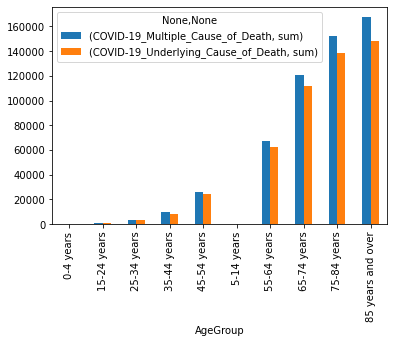

In [16]:
# Create a chart

age_death_covidsum.plot.bar()


In [ ]:
US_death_total_2019=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [ ]:
US_death_total_2019=US_death_total_2019.loc[US_death_total_2019['Date Of Death Year'] == 2019]

In [ ]:
US_death_total_2019.head()

In [ ]:
US_death_total_2020=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [ ]:
US_death_total_2020=US_death_total_2020.loc[US_death_total_2020['Date Of Death Year'] == 2020]

In [ ]:
US_death_total_2020.head()

In [ ]:
US_death_total_2021=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
US_death_total_2021=US_death_total_2021.loc[US_death_total_2021['Date Of Death Year'] == 2021]
US_death_total_2021.head()

In [ ]:
death_updated

In [ ]:
death_updated2=death_updated.groupby(["AgeGroup"])
#death_updated2 = death_updated3.copy()


In [ ]:
death_updated2.reset_index(inplace=True)
death_updated2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
death_updated2.sort_values(by='ordering', inplace=True)
death_updated2.rename(columns={'ordering': 'index'}, inplace=True)
death_updated2.set_index('index', inplace=True)
death_updated2

In [ ]:
HHS1_death_total_df2 = HHS1_death_total_df.copy()
HHS1_death_total_df2.reset_index(inplace=True)
HHS1_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS1_death_total_df2.sort_values(by='ordering', inplace=True)
HHS1_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS1_death_total_df2.set_index('index', inplace=True)
HHS1_death_total_df2

In [ ]:
HHS1_death_total=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_total = HHS1_death_total[HHS1_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS1_death_total=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS1_death_ages_grouped = HHS1_death_total.groupby(["AgeGroup"])
HHS1_death_ages_sum_multiple = HHS1_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS1_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS1_death_ages_sum_m_and_u = HHS1_death_ages_sum_multiple + HHS1_death_ages_sum_underlying


HHS1_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS1_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS1_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS1_death_ages_sum_m_and_u
                              })
HHS1_death_total_ages_final
HHS1_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS1_death_total_df

In [ ]:
HHS2_death_total=death_updated[death_updated["HHSRegion"].str.contains("2")==True]
HHS2_death_total = HHS2_death_total[HHS2_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS2_death_total=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS2_death_ages_grouped = HHS1_death_total.groupby(["AgeGroup"])
HHS2_death_ages_sum_multiple = HHS2_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS2_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS2_death_ages_sum_m_and_u = HHS2_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS2_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS2_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS2_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS2_death_ages_sum_m_and_u
                              })
HHS2_death_total_ages_final
HHS2_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS2_death_total_df

In [ ]:
HHS3_death_total=death_updated[death_updated["HHSRegion"].str.contains("3")==True]
HHS3_death_total = HHS3_death_total[HHS3_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS3_death_total=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS3_death_ages_grouped = HHS3_death_total.groupby(["AgeGroup"])
HHS3_death_ages_sum_multiple = HHS3_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS3_death_ages_sum_underlying = HHS3_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS3_death_ages_sum_m_and_u = HHS3_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS3_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS3_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS3_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS3_death_ages_sum_m_and_u
                              })
HHS3_death_total_ages_final
HHS3_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS3_death_total_df

In [ ]:
HHS4_death_total=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_total = HHS4_death_total[HHS4_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS4_death_total=HHS4_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS4_death_ages_grouped = HHS4_death_total.groupby(["AgeGroup"])
HHS4_death_ages_sum_multiple = HHS4_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS4_death_ages_sum_underlying = HHS4_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS4_death_ages_sum_m_and_u = HHS4_death_ages_sum_multiple + HHS4_death_ages_sum_underlying


HHS4_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS4_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS4_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS4_death_ages_sum_m_and_u
                              })
HHS4_death_total_ages_final

In [ ]:
#Repeat that process for all 11.... if there's an easier way I'm all ears, I tried a loop but failed

In [ ]:
x_axis = np.arange(len(HHS4_death_total_ages_final))
y_axis=HHS4_death_total_ages_final["Total COVID-19 Deaths"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-4 years", "5-14 years","15-24 years", "25-34 years", "35-44 years", "45-54 years","55-64 years","65-74 years","75-84 years","85 years and over"], rotation="vertical")
plt.show()

#basic idea.... but i still need to fix the 5-14 and 45-55 years mix up